In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Results

## Average selection

In [2]:
# file_name = './CWoLa_Hunting_Hidden_Valley_training_results.csv'
file_name = './CWoLa_Hunting_Hidden_Valley_training_results-2.csv'
df = pd.read_csv(file_name)

In [3]:
# cross-section x luminosity
n_bkg_in_SR = 136.1 * 139

In [4]:
def realistic_sensitivity(S, B):
    return np.sqrt(2 * (S + B) * np.log(1 + S/B) - 2 * S)


def convert_to_realistic_sensitivity(sensitivity, nB=136.1*139):
    nS = sensitivity * nB**0.5
    return realistic_sensitivity(nS, nB) 



def get_realistic_sensitivity_and_std(model_name_format, sensitivity_range=range(11), s=slice(-10, None)):
    # sensitivities after CWoLa selection with different background efficiencies 10%, 1%, 0.1%

    sensitivities = [[], [], []]
    stds = [[], [], []]

    # cross-section x luminosity
    n_bkg_in_SR = 136.1 * 139

    for i in sensitivity_range:
        model_name = model_name_format.format(i)
        # compute mean value and standard deviation of realistic sensitivity
        for j, fpr in enumerate([0.1, 0.01, 0.001]):
            scale_factor = df[df['Model Name'] == model_name][f'TPR/FPR^0.5: FPR={fpr}'][s]
            real_sensitivities = convert_to_realistic_sensitivity(i * scale_factor, nB=n_bkg_in_SR * fpr)
            sensitivities[j].append(real_sensitivities.mean())
            stds[j].append(real_sensitivities.std())

    return sensitivities, stds

def get_results_from_model_name_format(model_name_format):

    mus, stds = get_realistic_sensitivity_and_std(model_name_format)
    sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

    return sensitivities, mus, stds

## Comparison

In [5]:
def load_ZN_npy_file(npy_path):
    file   = np.load(npy_path)
    mu     = np.array([file["sigma_after01"],file["sigma_after001"],file["sigma_after0001"]])
    sigma  = np.array([file["sigma_after01_errorbar"],file["sigma_after001_errorbar"],file["sigma_after0001_errorbar"]])
    before = file["sigma_before"]
    
    return before, mu, sigma

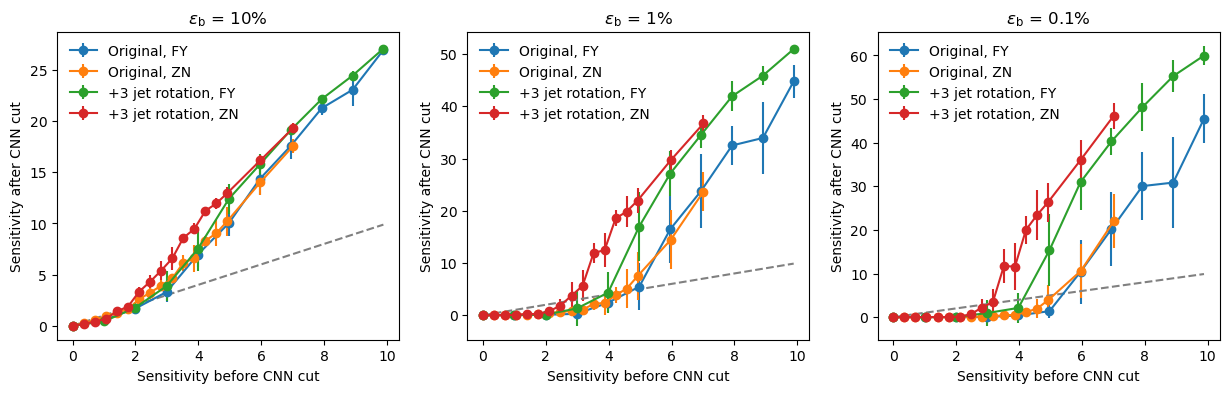

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_origin_b_ZN, sensitivities_origin_ZN, stds_origin_ZN = load_ZN_npy_file('./ZN_results/og-75.npz')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_75x75')
sensitivities_jet_aug_3_b_ZN, sensitivities_jet_aug_3_ZN, stds_jet_aug_3_ZN = load_ZN_npy_file('./ZN_results/rot-75-3.npz')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original, FY')
    ax[i].errorbar(sensitivities_origin_b_ZN, sensitivities_origin_ZN[i], yerr=stds_origin_ZN[i], marker='o', label='Original, ZN')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation, FY')
    ax[i].errorbar(sensitivities_jet_aug_3_b_ZN, sensitivities_jet_aug_3_ZN[i], yerr=stds_jet_aug_3_ZN[i], marker='o', label='+3 jet rotation, ZN')


    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_jet_aug_3_ZN_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

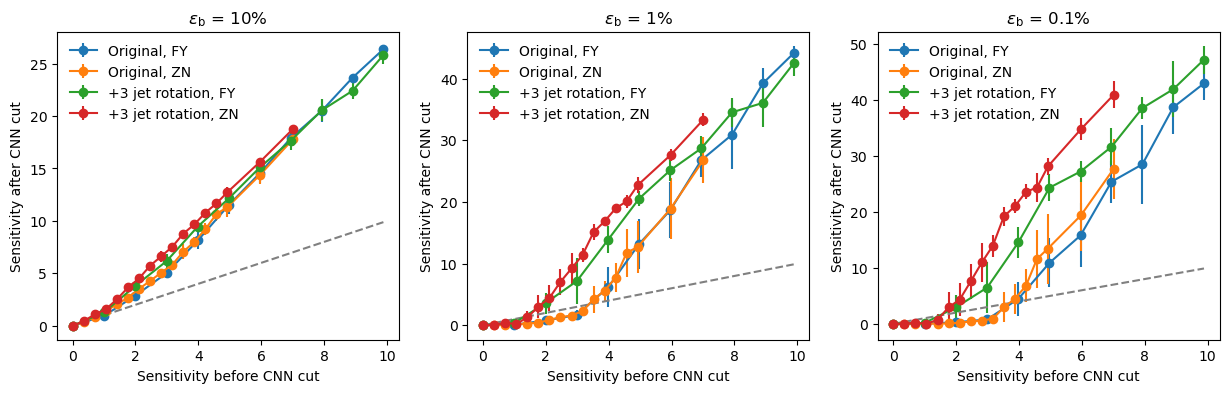

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_origin_b_ZN, sensitivities_origin_ZN, stds_origin_ZN = load_ZN_npy_file('./ZN_results/og-25.npz')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')
sensitivities_jet_aug_3_b_ZN, sensitivities_jet_aug_3_ZN, stds_jet_aug_3_ZN = load_ZN_npy_file('./ZN_results/rot-25-3.npz')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original, FY')
    ax[i].errorbar(sensitivities_origin_b_ZN, sensitivities_origin_ZN[i], yerr=stds_origin_ZN[i], marker='o', label='Original, ZN')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation, FY') 
    ax[i].errorbar(sensitivities_jet_aug_3_b_ZN, sensitivities_jet_aug_3_ZN[i], yerr=stds_jet_aug_3_ZN[i], marker='o', label='+3 jet rotation, ZN')


    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_jet_aug_3_ZN_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

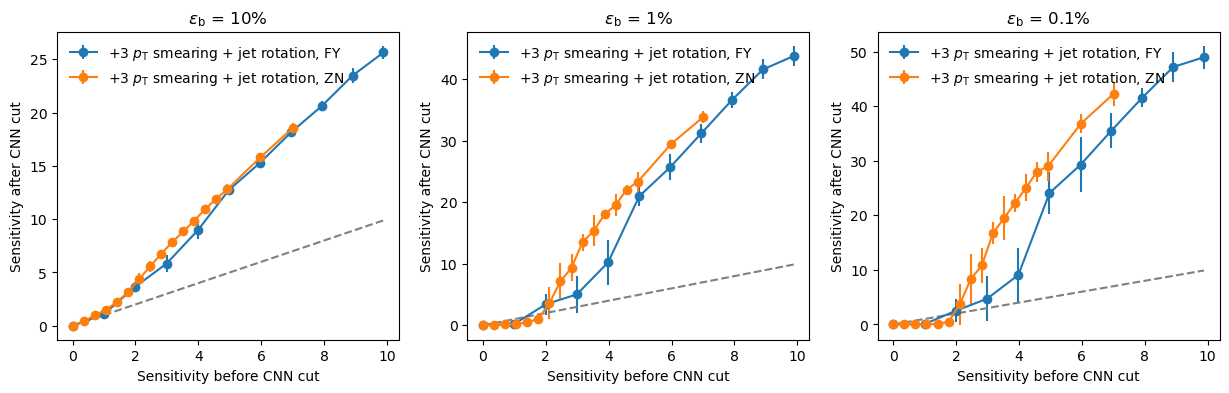

In [8]:
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_3_25x25')
sensitivities_pt_jet_aug_3_b_ZN, sensitivities_pt_jet_aug_3_ZN, stds_pt_jet_aug_3_ZN = load_ZN_npy_file('./ZN_results/ptrot-25-3.npz')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing + jet rotation, FY')
    ax[i].errorbar(sensitivities_pt_jet_aug_3_b_ZN, sensitivities_pt_jet_aug_3_ZN[i], yerr=stds_pt_jet_aug_3_ZN[i], marker='o', label='+3 $p_\mathrm{T}$ smearing + jet rotation, ZN')


    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_pt_jet_aug_3_ZN_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()